## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [ 2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch in BATCH_SIZE:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (batch))
    model = build_mlp(input_shape=x_train.shape[1:],)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(batch)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 2.000000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________

50000/50000 [==============================] - 142s 3ms/step - loss: 2.2808 - acc: 0.1329 - val_loss: 2.5625 - val_acc: 0.1543
Epoch 46/50
50000/50000 [==============================] - 142s 3ms/step - loss: 2.2809 - acc: 0.1304 - val_loss: 2.7441 - val_acc: 0.1423
Epoch 47/50
50000/50000 [==============================] - 142s 3ms/step - loss: 2.2909 - acc: 0.1243 - val_loss: 2.8758 - val_acc: 0.1453
Epoch 48/50
50000/50000 [==============================] - 143s 3ms/step - loss: 2.2818 - acc: 0.1293 - val_loss: 2.5212 - val_acc: 0.1483
Epoch 49/50
50000/50000 [==============================] - 143s 3ms/step - loss: 2.2647 - acc: 0.1421 - val_loss: 2.5200 - val_acc: 0.1594
Epoch 50/50
50000/50000 [==============================] - 142s 3ms/step - loss: 2.2570 - acc: 0.1535 - val_loss: 2.3843 - val_acc: 0.1912
Experiment with Regulizer = 16.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 

50000/50000 [==============================] - 19s 377us/step - loss: 1.1287 - acc: 0.6000 - val_loss: 1.2997 - val_acc: 0.5441
Epoch 44/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.1154 - acc: 0.6045 - val_loss: 1.3644 - val_acc: 0.5264
Epoch 45/50
50000/50000 [==============================] - 19s 377us/step - loss: 1.1215 - acc: 0.6032 - val_loss: 1.3844 - val_acc: 0.5171
Epoch 46/50
50000/50000 [==============================] - 19s 375us/step - loss: 1.1151 - acc: 0.6047 - val_loss: 1.3505 - val_acc: 0.5291
Epoch 47/50
50000/50000 [==============================] - 19s 375us/step - loss: 1.1117 - acc: 0.6090 - val_loss: 1.3635 - val_acc: 0.5260
Epoch 48/50
50000/50000 [==============================] - 19s 381us/step - loss: 1.0991 - acc: 0.6100 - val_loss: 1.3593 - val_acc: 0.5262
Epoch 49/50
50000/50000 [==============================] - 19s 377us/step - loss: 1.0980 - acc: 0.6137 - val_loss: 1.3776 - val_acc: 0.5291
Epoch 50/50
50000/50000 [=======

50000/50000 [==============================] - 10s 194us/step - loss: 0.8473 - acc: 0.6959 - val_loss: 1.5370 - val_acc: 0.5098
Epoch 42/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.8370 - acc: 0.7006 - val_loss: 1.6443 - val_acc: 0.4881
Epoch 43/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.8325 - acc: 0.7010 - val_loss: 1.6052 - val_acc: 0.4999
Epoch 44/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.8265 - acc: 0.7042 - val_loss: 1.5571 - val_acc: 0.4948
Epoch 45/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.8172 - acc: 0.7062 - val_loss: 1.5647 - val_acc: 0.5018
Epoch 46/50
50000/50000 [==============================] - 10s 201us/step - loss: 0.8148 - acc: 0.7079 - val_loss: 1.6011 - val_acc: 0.4959
Epoch 47/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.8049 - acc: 0.7119 - val_loss: 1.5923 - val_acc: 0.5094
Epoch 48/50
50000/50000 [=======

50000/50000 [==============================] - 4s 73us/step - loss: 0.3740 - acc: 0.8720 - val_loss: 2.1402 - val_acc: 0.4752
Epoch 40/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.3676 - acc: 0.8736 - val_loss: 2.2180 - val_acc: 0.4660
Epoch 41/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.3480 - acc: 0.8805 - val_loss: 2.1880 - val_acc: 0.4628
Epoch 42/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.3427 - acc: 0.8814 - val_loss: 2.1769 - val_acc: 0.4846
Epoch 43/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.3292 - acc: 0.8878 - val_loss: 2.2331 - val_acc: 0.4670
Epoch 44/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.3327 - acc: 0.8840 - val_loss: 2.3128 - val_acc: 0.4793
Epoch 45/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.3212 - acc: 0.8900 - val_loss: 2.2745 - val_acc: 0.4642
Epoch 46/50
50000/50000 [=====================

Epoch 38/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.3143 - acc: 0.9047 - val_loss: 2.1972 - val_acc: 0.4618
Epoch 39/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.3052 - acc: 0.9063 - val_loss: 2.2341 - val_acc: 0.4691
Epoch 40/50
50000/50000 [==============================] - 2s 50us/step - loss: 0.2888 - acc: 0.9127 - val_loss: 2.2989 - val_acc: 0.4632
Epoch 41/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.2748 - acc: 0.9175 - val_loss: 2.2408 - val_acc: 0.4637
Epoch 42/50
50000/50000 [==============================] - 2s 50us/step - loss: 0.2609 - acc: 0.9231 - val_loss: 2.3384 - val_acc: 0.4535
Epoch 43/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.2511 - acc: 0.9252 - val_loss: 2.2937 - val_acc: 0.4669
Epoch 44/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.2382 - acc: 0.9313 - val_loss: 2.2991 - val_acc: 0.4687
Epoch 45/50
50000/50000 [=========

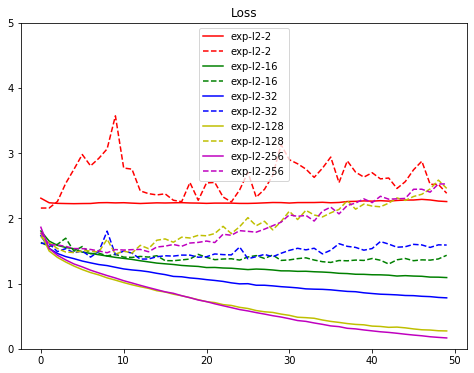

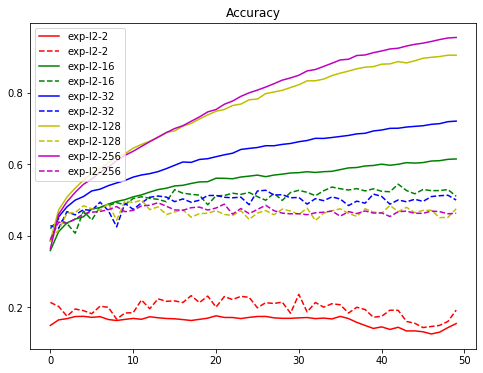

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]
"""Code Here
將結果繪出
"""
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()